In [1]:
# import libraries
import pandas as pd
import numpy
import matplotlib
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
import config
from cadCAD import configs
import matplotlib.pyplot as plt

%matplotlib inline

exec_mode = ExecutionMode()

[{'T': range(0, 720), 'N': 1, 'M': [{}]}]


In [2]:
# Run Cad^2

first_config = configs # only contains config1
single_proc_ctx = ExecutionContext(context=exec_mode.single_proc)
run = Executor(exec_context=single_proc_ctx, configs=first_config)

raw_result, tensor_field = run.execute()
df = pd.DataFrame(raw_result)
df.set_index(['run', 'timestep', 'substep'])


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: single_proc: [<cadCAD.configuration.Configuration object at 0x1163ca9b0>]
Configurations: [<cadCAD.configuration.Configuration object at 0x1163ca9b0>]


redemption_rate  redemption_price  market_price
run timestep substep                                                 
1   0        0                      3          0.710000      0.710000
    1        1                      3          0.710243      0.710000
    2        1                      3          0.710486      0.710012
    3        1                      3          0.710730      0.710036
    4        1                      3          0.710973      0.710071
...                               ...               ...           ...
    716      1                      3          0.907259      0.901088
    717      1                      3          0.907570      0.901396
    718      1                      3          0.907881      0.901705
    719      1                      3          0.908192      0.902014
    720      1                      3          0.908503      0.902323

[721 rows x 3 columns]

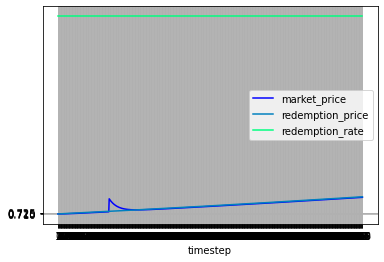

In [3]:
df.plot('timestep', ['market_price', 'redemption_price', 'redemption_rate'], 
        grid=True, 
        colormap = 'winter',
        xticks=list(range(0, 720)),
        yticks=[0.71, 0.715, 0.720, 0.725],
        secondary_y=list(range(3))
       );